In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/T5/labelsw.csv')

In [ ]:
df

,ClassId,Name
0,7,speed limit (80km/h)
1,10,Dont Go straight
2,11,Dont Go Left
3,12,Dont Go Left or Right
4,13,Dont Go Right
5,15,No Uturn
6,20,Go straight or right
7,21,Go straight
8,22,Go Left
9,23,Go Left or right


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ClassId  12 non-null     int64  
 1   Name     0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


In [ ]:
df.describe()

,ClassId,Name
count,12.000000,0.0
mean,19.333333,NaN
std,12.316532,NaN
min,7.000000,NaN
25%,11.750000,NaN
50%,17.500000,NaN
75%,22.250000,NaN
max,54.000000,NaN


In [ ]:
df.isnull().sum()

,0
ClassId,0
Name,12


In [ ]:
print(df.head())  # First 5 rows
print(df.tail())  # Last 5 rows
print(df.sample(5))  # Random 5 rows

   ClassId  Name
0        7   NaN
1       10   NaN
2       11   NaN
3       12   NaN
4       13   NaN
    ClassId  Name
7        21   NaN
8        22   NaN
9        23   NaN
10       24   NaN
11       54   NaN
    ClassId  Name
11       54   NaN
2        11   NaN
1        10   NaN
8        22   NaN
7        21   NaN


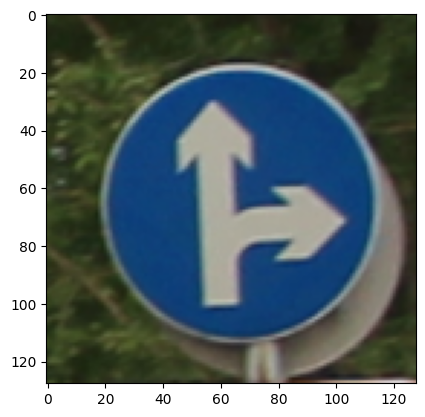

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image_path, size=(128, 128)):
    image = Image.open(image_path)
    image = image.resize(size)
    return np.array(image)

# # Example usage
resized_image = resize_image('/content/drive/MyDrive/T5/traffic_Data/DATA/20/020_0001.png')
plt.imshow(resized_image)

In [ ]:
# Normalization

def normalize_image(image_array):
    return image_array / 255.0

# Example usage
normalized_image = normalize_image(resized_image)

In [ ]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example usage
augmented_images = datagen.flow(np.expand_dims(normalized_image, 0), batch_size=1)

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
print(df.corr())

         ClassId  Name
ClassId      1.0   NaN
Name         NaN   NaN


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/drive/MyDrive/T5/traffic_Data/DATA'
test_dir = '/content/drive/MyDrive/T5/traffic_Data/TEST1'

# Create ImageDataGenerator for training with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Create ImageDataGenerator for test data (no augmentation needed)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Define your model (example)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Use Input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')  # Ensure 12 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune hyperparameters
batch_size = 32
epochs = 10

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)


Found 468 images belonging to 12 classes.
Found 111 images belonging to 12 classes.
Found 12 images belonging to 1 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 97s 6s/step - accuracy: 0.2352 - loss: 4.3960 - val_accuracy: 0.6216 - val_loss: 1.4092
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.6257 - loss: 1.1802 - val_accuracy: 0.7117 - val_loss: 0.7974
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.8474 - loss: 0.5093 - val_accuracy: 0.8288 - val_loss: 0.5597
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.9186 - loss: 0.2712 - val_accuracy: 0.8198 - val_loss: 0.4070
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.9531 - loss: 0.1535 - val_accuracy: 0.8559 - val_loss: 0.5566
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9563 - loss: 0.1476 - val_accuracy: 0.9189 - val_loss: 0.2413
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.9727 - loss: 0.0838 - val_accuracy: 0.9099 - val_loss: 0.3073
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step - accuracy: 0.9867 - loss: 0.0531 - val_accuracy: 0.9369 - val_loss: 0.1706
Epo

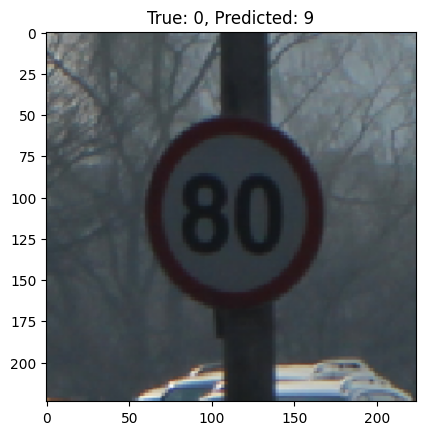

ValueError: Asked to retrieve element 1, but the Sequence has length 1

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    img, label = test_generator[i]
    plt.imshow(img[0])
    plt.title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


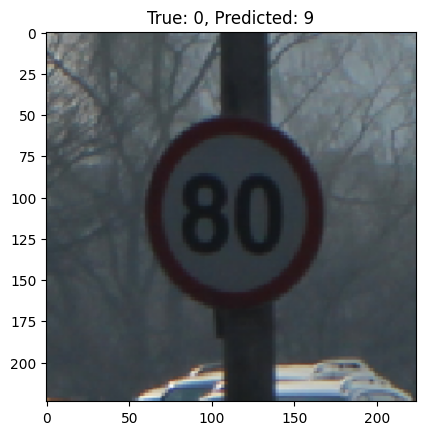

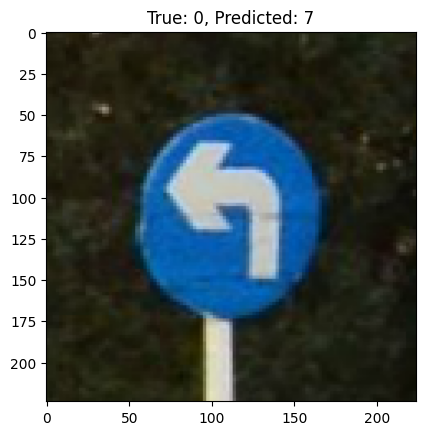

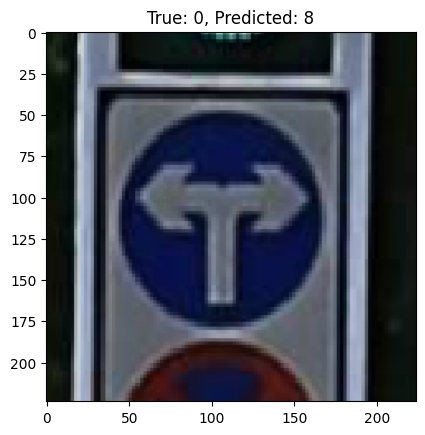

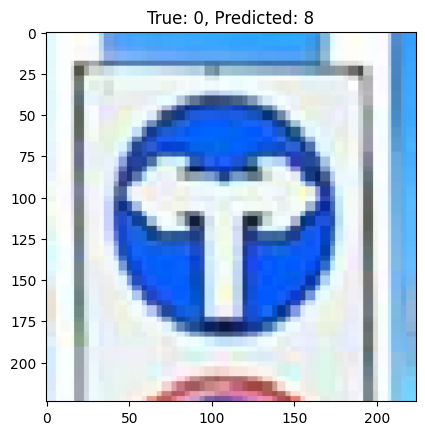

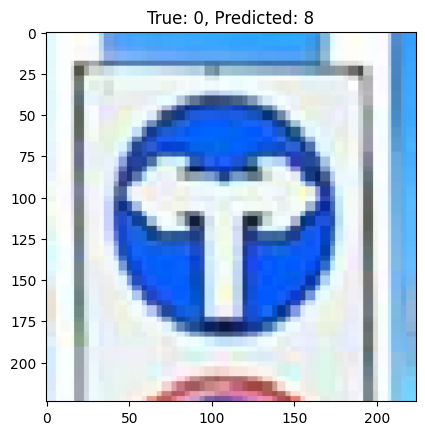

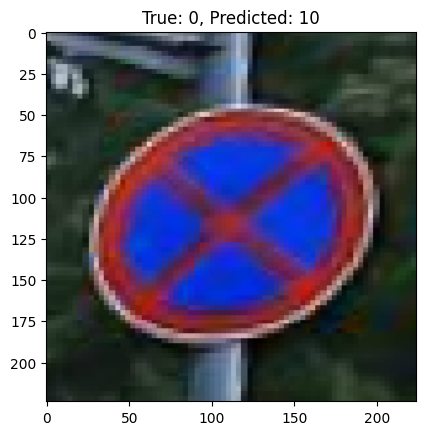

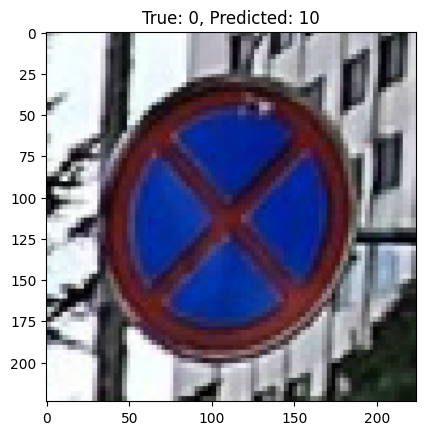

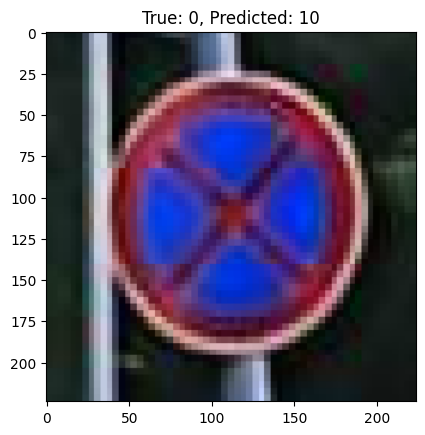

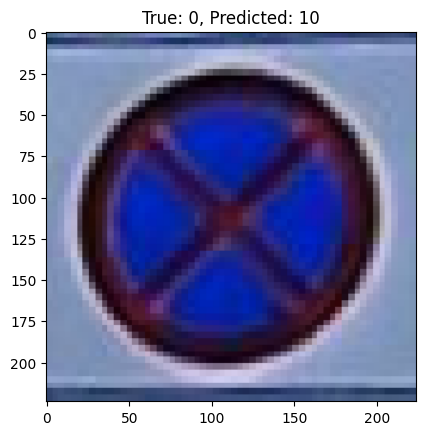

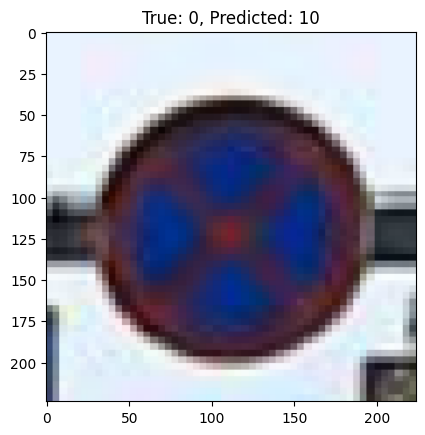

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of test images and labels
images, labels = next(test_generator)

# Get predicted labels for the batch
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the first 10 images with their true and predicted labels
for i in range(10):
    plt.imshow(images[i])
    plt.title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


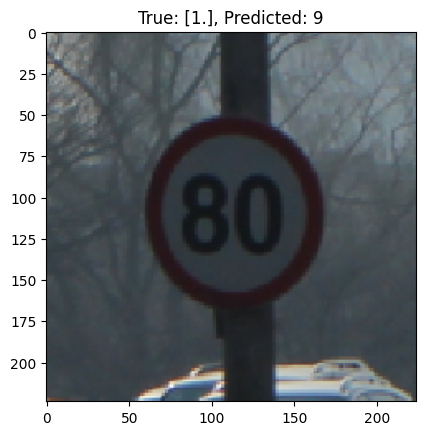

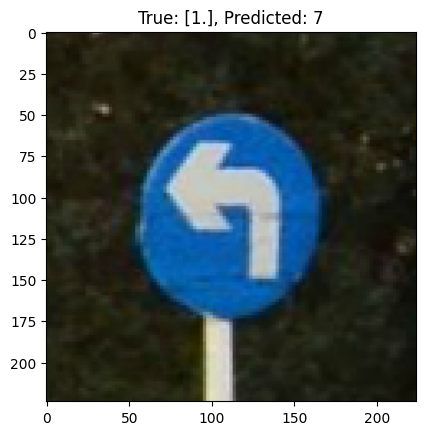

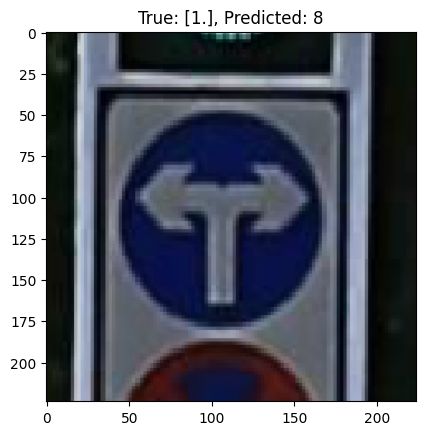

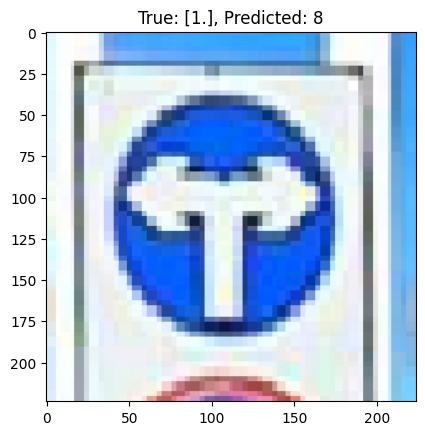

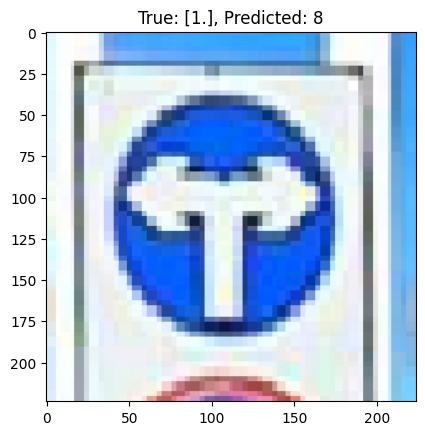

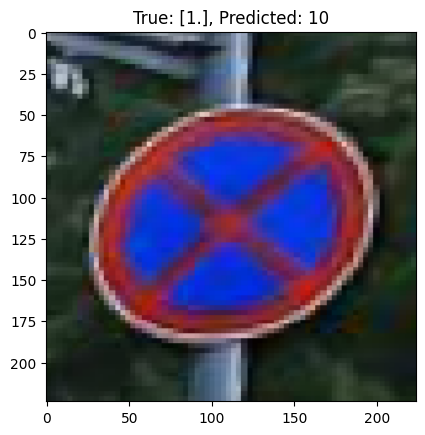

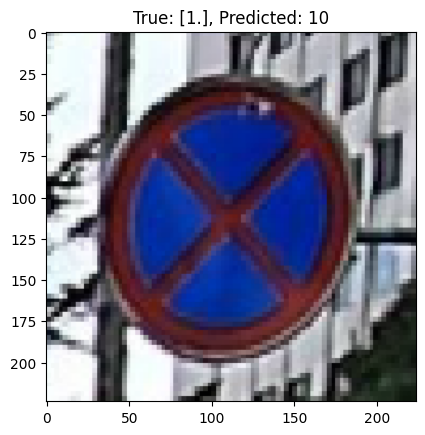

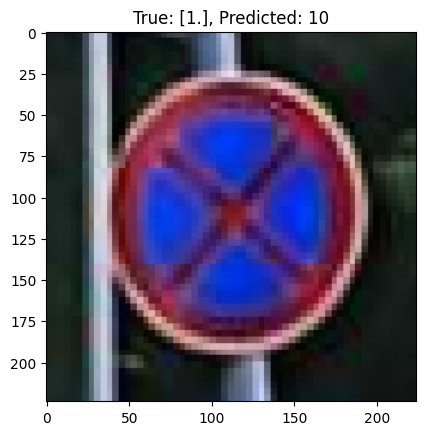

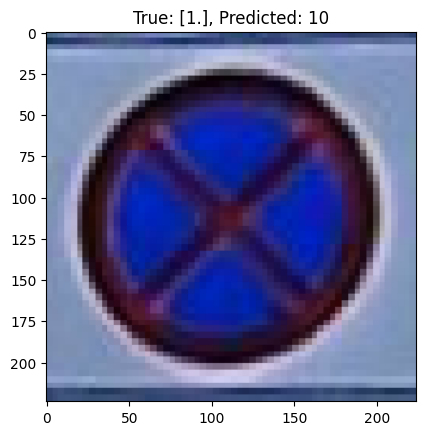

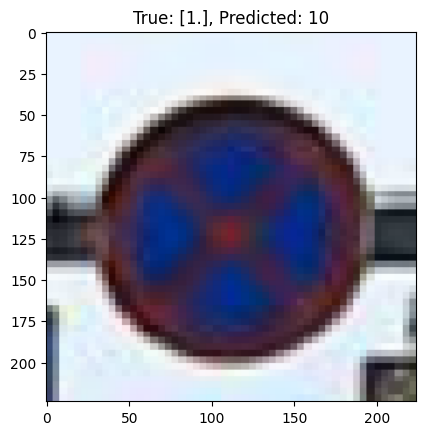

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of test images and labels
images, labels = next(test_generator)

# Get predicted labels for the batch
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the first 10 images with their true and predicted labels
for i in range(10):
    plt.imshow(images[i])
    plt.title(f'True: {labels[i]}, Predicted: {predicted_labels[i]}')
    plt.show()


In [ ]:
print(test_generator.class_indices)


{'itest': 0}


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step - accuracy: 0.0000e+00 - loss: 310.4828
Test accuracy: 0.0000
Test loss: 310.4828


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
!pip install tensorflow

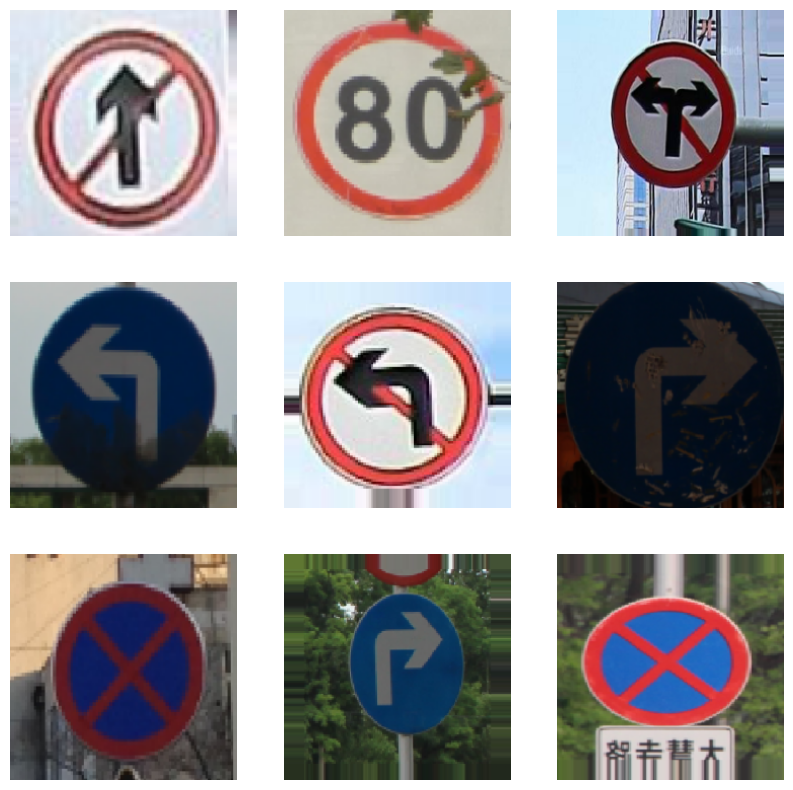

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images
def plot_images(generator, num_images=9):
    # Get a batch of images and labels
    images, labels = next(generator)

    # Determine the grid size (e.g., 3x3)
    grid_size = int(np.sqrt(num_images))

    # Create a figure with subplots
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(images[i])
        plt.axis('off')

    plt.show()

# Plot images from the training generator
plot_images(train_generator)

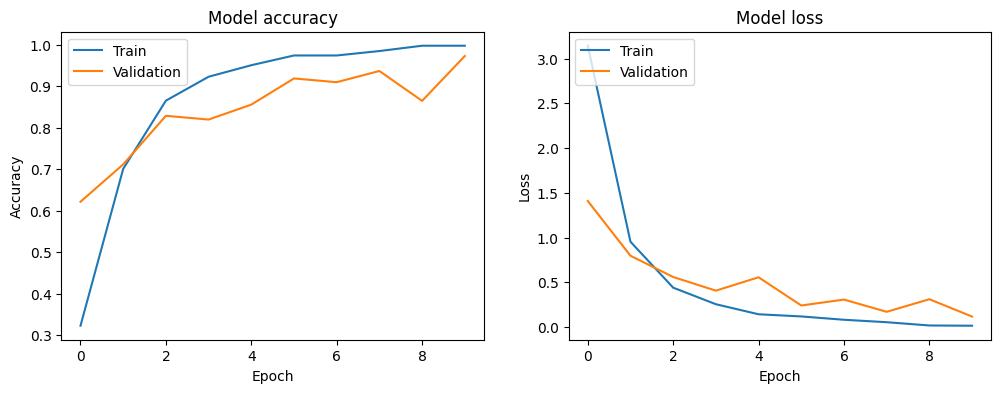

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # You can set a higher number of epochs
    callbacks=[early_stopping]
)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 471ms/step - accuracy: 0.9926 - loss: 0.0195 - val_accuracy: 0.9688 - val_loss: 0.1546
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9333 - val_loss: 0.8997
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - accuracy: 0.9911 - loss: 0.0273 - val_accuracy: 0.9583 - val_loss: 0.1574
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 8.9501e-04
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 391ms/step - accuracy: 0.9989 - loss: 0.0188 - val_accuracy: 0.9479 - val_loss: 0.3609
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 300ms/step - accuracy: 0.9992 - loss: 0.0215 - val_accuracy: 0.9688 - val_loss: 0.1208
